In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [3]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [4]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)


16

In [6]:
len(y_test)

16

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### create the neural network model

In [8]:
# A good rule of thumb for a basic neural network is to have two to 
# three times the amount of neurons in the hidden layer as the number of inputs.
# Our FINAL_DATAFRAME has 10 input features (columns) of data.

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 20

nn_A = tf.keras.models.Sequential()

# First hidden layer
nn_A.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU"))

# Second hidden layer
nn_A.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Output layer
nn_A.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [11]:
# Compile the model
nn_A.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [12]:
# Train the model
fit_model = nn_A.fit(X_train_scaled,y_train,epochs=15,callbacks=[cp_callback])

Epoch 1/15
2/2 [==============================] - 1s 3ms/step - loss: -2.9020 - accuracy: 0.0000e+00
Epoch 2/15
2/2 [==============================] - 0s 8ms/step - loss: -3.9334 - accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 0s 9ms/step - loss: -3.6730 - accuracy: 0.0000e+00
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: -4.6112 - accuracy: 0.0000e+00
Epoch 5/15
1/2 [==============>...............] - ETA: 0s - loss: -7.3738 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 65ms/step - loss: -5.0042 - accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: -5.3708 - accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 11ms/step - loss: -5.7444 - accuracy: 0.0000e+00
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: -6.1375 - accuracy: 0.0000e+00
Epoch 9/15
2/2 [==============================] - 0

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_A.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -2.7682e+01 - accuracy: 0.0000e+00 - 179ms/epoch - 179ms/step
Loss: -27.681987762451172, Accuracy: 0.0


<AxesSubplot:>

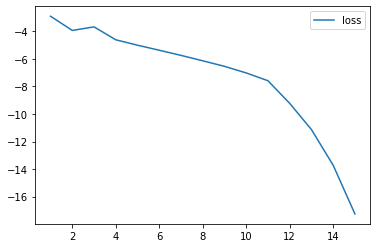

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

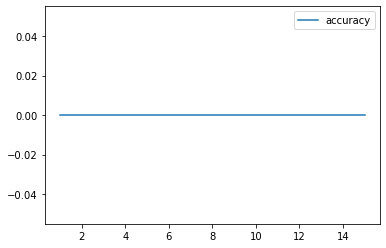

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Second attempt - adding a third hidden layer, adding more epochs, more nodes

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn_B = tf.keras.models.Sequential()

# First hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_B.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                440       
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn_B.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [18]:
# Train the model
fit_model_B = nn_B.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
2/2 [==============================] - 1s 4ms/step - loss: 1.6045 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7023 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: -0.2142 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: -1.1098 - accuracy: 0.0000e+00
Epoch 5/50
1/2 [==============>...............] - ETA: 0s - loss: -1.8646 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 245ms/step - loss: -2.1277 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: -3.1995 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: -4.6670 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: -8.7386 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_B.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -5.3468e+01 - accuracy: 0.0000e+00 - 138ms/epoch - 138ms/step
Loss: -53.4676399230957, Accuracy: 0.0


<AxesSubplot:>

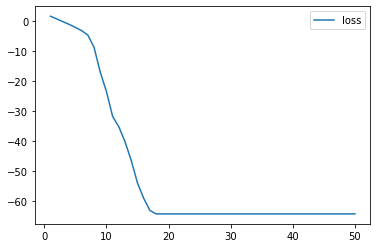

In [20]:
# Create a DataFrame containing training history
history_df_B = pd.DataFrame(fit_model_B.history, index=range(1,len(fit_model_B.history["loss"])+1))

# Plot the loss
history_df_B.plot(y="loss")

<AxesSubplot:>

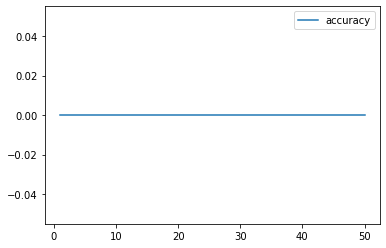

In [21]:
# Plot the accuracy
history_df_B.plot(y="accuracy")

### Now a third attempt without the Covid-19 data

In [22]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [23]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT", "Covid_New_Cases", "Covid_Death"])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)


16

In [25]:
len(y_test)

16

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn_C = tf.keras.models.Sequential()

# First hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_C.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_C.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 40)                360       
                                                                 
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn_C.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [29]:
# Train the model
fit_model_C = nn_C.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
2/2 [==============================] - 1s 3ms/step - loss: -2.7146 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: -4.3223 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: -6.2964 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: -7.4523 - accuracy: 0.0000e+00
Epoch 5/50
1/2 [==============>...............] - ETA: 0s - loss: -8.9664 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 62ms/step - loss: -11.7823 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: -14.4427 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: -19.9026 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: -25.1063 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================]

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_C.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -5.3468e+01 - accuracy: 0.0000e+00 - 140ms/epoch - 140ms/step
Loss: -53.4676399230957, Accuracy: 0.0


<AxesSubplot:>

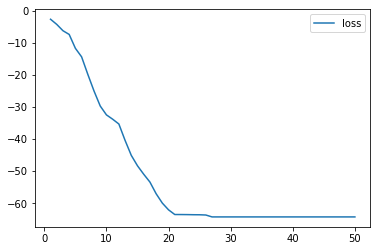

In [31]:
# Create a DataFrame containing training history
history_df_C = pd.DataFrame(fit_model_C.history, index=range(1,len(fit_model_C.history["loss"])+1))

# Plot the loss
history_df_C.plot(y="loss")

<AxesSubplot:>

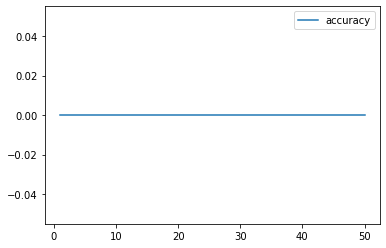

In [32]:
# Plot the accuracy
history_df_C.plot(y="accuracy")